In [4]:
import pandas as pd
import numpy as np
import time
import random
import spotipy
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup  

In [3]:
# Set up credentials to use spotify API 

with open('/home/thedatacurious/Documents/Metis/spotify.txt') as f:
    content = f.readlines()
    content = [x.strip() for x in content]

client_id = content[0]
secret = content[1]

from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id = client_id, client_secret = secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [3]:
# Top tracks in 2018: 'Spotify', 37i9dQZF1DX1HUbZS4LEyL'
# For weddings: 'Spotify USA', '3xFtUEds8tZIbumGZocREv?'
# Alone again: 'Spotify', '37i9dQZF1DWX83CujKHHOn'

# Broken Hears: 'Spotify', '37i9dQZF1DXbrUpGvoi3TS?'

In [4]:
# Get details of playlist through API

def playlist_details(user, playlist_id):
    '''
    inputs (str): takes in user behind the playlist and playlist_id
    outputs (list): returns a dataframe containing track details:
    artist, album_title, album_uri, track_title,track_id, release_date
    '''
    playlist = list()
    
    results = sp.user_playlist(user, playlist_id)
    tracks = results['tracks']
    for i, item in enumerate(tracks['items']):
        track = item['track']
        artist = track['artists'][0]['name']
        album_title = track['album']['name']
        track_title = track['name']
        track_id = track['id'].strip()
        album_uri = track['album']['uri']
        release_date = track['album']['release_date']
        hit = [artist, album_title, album_uri, track_title,track_id, release_date]
        playlist.append(hit)
    
    df = pd.DataFrame(playlist, columns = ['artist', 'album_title', 'album_uri', 'track_title','track_id', 'release_date'])
    return df

In [5]:
# Get track attributes 
    
def extract_features(track_ids):
    '''
    inputs (dict): takes in series of track id
    use 'track_id' to call spotify api for attributes
    
    outputs (dataframe): returns a dataframe with track attributes as columns
    '''
    
    tracks_list_wfeatures = list()

    for track_id in track_ids:
        a_track_features = sp.audio_features(track_id)[0]
        tracks_list_wfeatures.append(a_track_features)
    
    df = pd.DataFrame(tracks_list_wfeatures)
    
    return df

In [7]:
wedding = playlist_details('Spotify USA', '3xFtUEds8tZIbumGZocREv?')
wedding2 = extract_features(wedding.track_id)
wedding_playlist = wedding.merge(wedding2, right_on= 'id', left_on = 'track_id')
wedding_playlist.to_csv('../data/raw/wedding_playlist.csv', index = False)

In [8]:
top = playlist_details('Spotify', '37i9dQZF1DX1HUbZS4LEyL')
top2 = extract_features(top.track_id)
top_playlist = top.merge(top2, right_on= 'id', left_on = 'track_id')
top_playlist.to_csv('../data/raw/top2018hits_playlist.csv', index = False)

In [8]:
alone = playlist_details('Spotify', '37i9dQZF1DWX83CujKHHOn')
alone2 = extract_features(alone.track_id)
alone_playlist = alone.merge(alone2, right_on= 'id', left_on = 'track_id')

In [9]:
broken = playlist_details('Spotify', '37i9dQZF1DXbrUpGvoi3TS?')
broken2 = extract_features(broken.track_id)
broken_playlist = broken.merge(broken2, right_on= 'id', left_on = 'track_id')
broken_playlist.to_csv('../data/raw/broken_heart_playlist.csv', index = False)

In [5]:
def playlist_genre(playlist):
    driver = webdriver.Firefox()
    genres = list()
    for i, j in enumerate(playlist.index):
        search_text = "genre {} {}".format(playlist.track_title[i], playlist.artist[i]).replace(" ", "+")
        driver.get('https://www.google.com.np/#q='+ search_text)
        page_source = driver.page_source
        soup = BeautifulSoup(page_source, 'html.parser')
        element = soup.find(class_ = 'Z0LcW')
        if element == None:
            genres.append(np.nan)
        else:
            genres.append(element.text)
        time.sleep(random.randint(1,6))
                            

In [6]:
wedding = pd.read_csv('../data/raw/wedding_playlist.csv')
wedding_genres = playlist_genre(wedding)

KeyboardInterrupt: 

In [13]:
wedding_genres

NameError: name 'wedding_genres' is not defined

In [37]:
broken = pd.read_csv('../data/raw/broken_heart_playlist.csv')
#broken_genres = playlist_genre(broken)

In [38]:
top = pd.read_csv('../data/raw/top2018hits_playlist.csv')
#top_genres = playlist_genre(top)

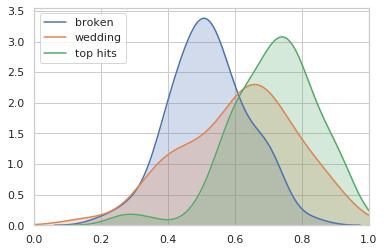

In [77]:
plt.xlim(0, 1)
for i in [broken, wedding, top]:
    sns.kdeplot(i.danceability, shade = True)
    plt.legend(labels = ['broken', 'wedding', 'top hits']);

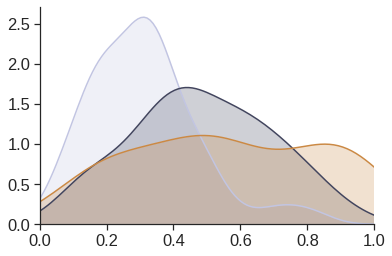

In [96]:
col = ["#c2c5e2","#42455e","#CB8944"]
sns.set(style="ticks",font_scale = 1.5, font = 'Liberation Sans')
plt.xlim(0, 1)
for i,j in enumerate([broken, top, wedding]):
    sns.kdeplot(j.valence, shade = True, color = col[i],clip=(0.0, 1.0), legend = None)
#plt.legend(labels = ['Songs for the Broken Heart','Top Hits', 'Popular Wedding Songs'])
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.savefig("valence_dist.svg")

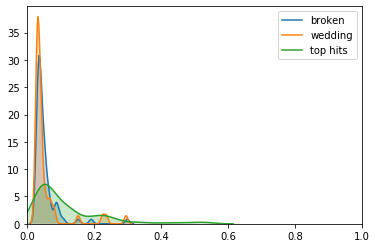

In [275]:
plt.xlim(0, 1)
for i in [broken, wedding, top_playlist]:
    sns.kdeplot(i.speechiness, shade =True)
plt.legend(labels = ['broken', 'wedding', 'top hits']);

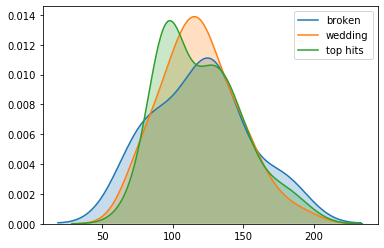

In [25]:
for i in [broken_playlist, wedding_playlist, top_playlist]:
    sns.kdeplot(i.tempo, shade =True)
plt.legend(labels = ['broken', 'wedding', 'top hits']);

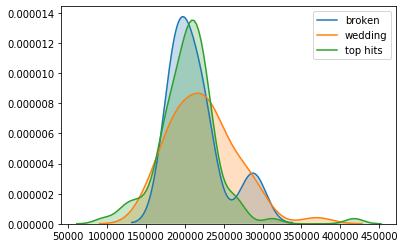

In [27]:
for i in [broken_playlist, wedding_playlist, top_playlist]:
    sns.kdeplot(i.duration_ms, shade =True)
plt.legend(labels = ['broken', 'wedding', 'top hits']);

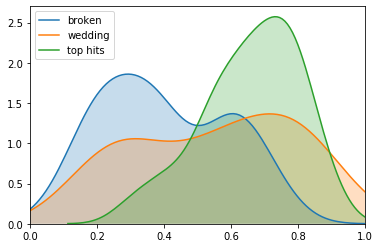

In [272]:
plt.xlim(0, 1)
for i in [broken, wedding, top]:
    sns.kdeplot(i.energy, shade =True)
plt.legend(labels = ['broken', 'wedding', 'top hits']);

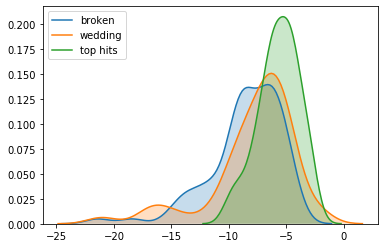

In [273]:
for i in [broken, wedding, top]:
    sns.kdeplot(i.loudness, shade =True)
plt.legend(labels = ['broken', 'wedding', 'top hits']);

In [55]:
wedding.iloc[2]

artist                  Ed Sheeran
album_title     x (Deluxe Edition)
track_title      Thinking out Loud
release_date            2014-06-21
energy                       0.445
acousticness                 0.474
valence                      0.591
Name: 2, dtype: object

In [68]:
wedding.describe()

,energy,acousticness,valence
count,50.000000,50.000000,50.000000
mean,0.552700,0.364151,0.564474
std,0.240978,0.332747,0.278111
min,0.129000,0.002490,0.099700
25%,0.303250,0.063275,0.336500
50%,0.585000,0.290500,0.535000
75%,0.766750,0.638250,0.846000
max,0.970000,0.977000,0.980000


In [11]:
pd.set_option('display.max_columns', None)
wedding.head(7)

,artist,album_title,album_uri,track_title,track_id,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,John Legend,Love In The Future (Expanded Edition),spotify:album:4OTAx9un4e6NfoHuVRiOrC,All of Me,3U4isOIWM3VvDubwSI3y7a,2013-08-30,0.422,0.264,8,-7.064,1,0.0322,0.922,0.000000,0.1320,0.331,119.930,audio_features,3U4isOIWM3VvDubwSI3y7a,spotify:track:3U4isOIWM3VvDubwSI3y7a,https://api.spotify.com/v1/tracks/3U4isOIWM3Vv...,https://api.spotify.com/v1/audio-analysis/3U4i...,269560,4
1,Bruno Mars,Doo-Wops & Hooligans,spotify:album:1uyf3l2d4XYwiEqAb7t7fX,Marry You,22PMfvdz35fFKYnJyMn077,2010-10-05,0.620,0.832,10,-4.848,1,0.0360,0.332,0.000000,0.1040,0.481,144.926,audio_features,22PMfvdz35fFKYnJyMn077,spotify:track:22PMfvdz35fFKYnJyMn077,https://api.spotify.com/v1/tracks/22PMfvdz35fF...,https://api.spotify.com/v1/audio-analysis/22PM...,230120,4
2,Ed Sheeran,x (Deluxe Edition),spotify:album:1xn54DMo2qIqBuMqHtUsFd,Thinking out Loud,34gCuhDGsG4bRPIf9bb02f,2014-06-21,0.781,0.445,2,-6.061,1,0.0295,0.474,0.000000,0.1840,0.591,78.998,audio_features,34gCuhDGsG4bRPIf9bb02f,spotify:track:34gCuhDGsG4bRPIf9bb02f,https://api.spotify.com/v1/tracks/34gCuhDGsG4b...,https://api.spotify.com/v1/audio-analysis/34gC...,281560,4
3,Christina Perri,A Thousand Years,spotify:album:15yvc643iYfQtb6zh9NEJo,A Thousand Years,6lanRgr6wXibZr8KgzXxBl,2011-10-18,0.421,0.407,10,-7.445,1,0.0267,0.309,0.000961,0.1100,0.161,139.028,audio_features,6lanRgr6wXibZr8KgzXxBl,spotify:track:6lanRgr6wXibZr8KgzXxBl,https://api.spotify.com/v1/tracks/6lanRgr6wXib...,https://api.spotify.com/v1/audio-analysis/6lan...,285120,3
4,The Lumineers,The Lumineers,spotify:album:6NWYmlHxAME5KXtxrTlUxW,Ho Hey,0W4Kpfp1w2xkY3PrV714B7,2012-04-03,0.685,0.466,0,-9.074,1,0.0304,0.794,0.000002,0.0915,0.353,79.936,audio_features,0W4Kpfp1w2xkY3PrV714B7,spotify:track:0W4Kpfp1w2xkY3PrV714B7,https://api.spotify.com/v1/tracks/0W4Kpfp1w2xk...,https://api.spotify.com/v1/audio-analysis/0W4K...,163133,4
5,Train,"Save Me, San Francisco (Golden Gate Edition)",spotify:album:7tEPbuzTMNGSytEMdezXtS,Marry Me,0VZ9xPNa6ROafP6GYYuv2S,2009,0.366,0.269,0,-8.456,1,0.0287,0.829,0.000017,0.1080,0.492,86.577,audio_features,0VZ9xPNa6ROafP6GYYuv2S,spotify:track:0VZ9xPNa6ROafP6GYYuv2S,https://api.spotify.com/v1/tracks/0VZ9xPNa6ROa...,https://api.spotify.com/v1/audio-analysis/0VZ9...,205453,4
6,Jason Mraz,We Sing. We Dance. We Steal Things.,spotify:album:04G0YylSjvDQZrjOfE5jA5,Lucky,0IktbUcnAGrvD03AWnz3Q8,2008-05-12,0.623,0.417,0,-8.699,1,0.0354,0.296,0.000000,0.1350,0.721,130.032,audio_features,0IktbUcnAGrvD03AWnz3Q8,spotify:track:0IktbUcnAGrvD03AWnz3Q8,https://api.spotify.com/v1/tracks/0IktbUcnAGrv...,https://api.spotify.com/v1/audio-analysis/0Ikt...,191360,4


In [8]:
def nr_balls(acousticness):
    return int(round((1-acousticness)*100,0))

In [14]:
nr_balls(wedding.loc[:,'acousticness'].iloc[1])

67

In [22]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 25 columns):
artist              230 non-null object
album_title         230 non-null object
album_uri           230 non-null object
track_title         230 non-null object
track_id            230 non-null object
release_date        230 non-null object
danceability        230 non-null float64
energy              230 non-null float64
key                 230 non-null int64
loudness            230 non-null float64
mode                230 non-null int64
speechiness         230 non-null float64
acousticness        230 non-null float64
instrumentalness    230 non-null float64
liveness            230 non-null float64
valence             230 non-null float64
tempo               230 non-null float64
type                230 non-null object
id                  230 non-null object
uri                 230 non-null object
track_href          230 non-null object
analysis_url        230 non-null object
duration

In [20]:
broken['label'] = 'broken'
wedding['label'] = 'wedding'
top['label'] = 'top'

In [21]:
full = pd.concat([top, broken, wedding], ignore_index = True)

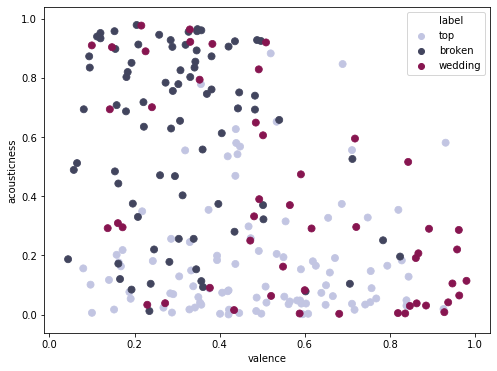

In [37]:
plt.figure(figsize=(8,6))
#"#91cef4" for broken
#col = [ "#3c4666","#91cef4" ,"#991c64"]
sns.scatterplot(y="acousticness", x="valence", hue = "label", hue_order = [ "top", "broken", "wedding"], palette = col, edgecolor = None, data = full, s = 50);

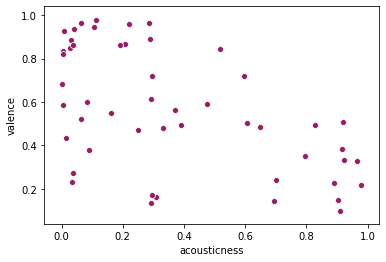

In [323]:
sns.scatterplot(x="acousticness", y="valence", c = ["#991c64"], data = wedding, marker = 'o');

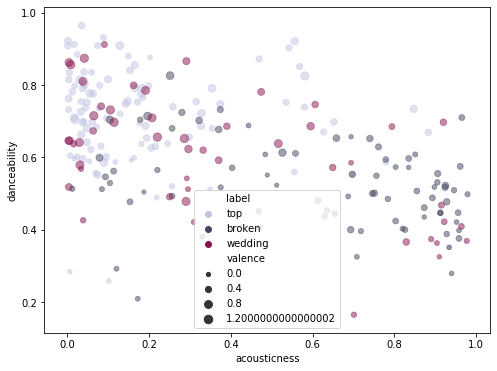

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x ="acousticness", y="danceability", size = full["valence"], hue = "label", alpha = .5, palette = col, edgecolor = None, data = full, s = 20);

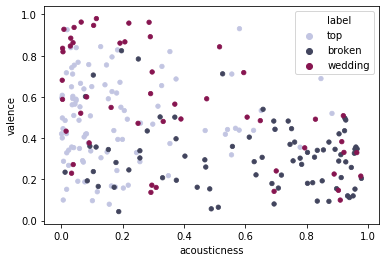

In [35]:
sns.scatterplot(x ="acousticness", y="valence",  hue = "label", palette = col, edgecolor = None, data = full, s = 20);

In [76]:
wedding[(wedding.acousticness < 0.5) & (wedding.energy > 0.5)].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0
mean,0.673862,0.730724,4.896552,-5.917241,0.758621,0.068407,0.129536,0.000133,0.161790,0.687759,123.359379,231695.379310,4.0
std,0.124323,0.120015,3.436618,1.638808,0.435494,0.069243,0.124660,0.000364,0.120156,0.252716,26.500628,45048.410469,0.0
min,0.426000,0.512000,0.000000,-9.404000,0.000000,0.025400,0.002490,0.000000,0.034400,0.137000,71.774000,158040.000000,4.0
25%,0.592000,0.609000,2.000000,-6.819000,1.000000,0.033400,0.030400,0.000000,0.085600,0.493000,108.840000,199938.000000,4.0
50%,0.656000,0.748000,5.000000,-5.659000,1.000000,0.040300,0.082300,0.000000,0.133000,0.819000,119.250000,230120.000000,4.0
75%,0.741000,0.809000,7.000000,-4.877000,1.000000,0.064800,0.220000,0.000081,0.193000,0.892000,144.871000,248907.000000,4.0
max,0.912000,0.970000,11.000000,-2.206000,1.000000,0.296000,0.390000,0.001870,0.577000,0.980000,193.437000,369627.000000,4.0


In [34]:
full2 = full.drop(columns = ["key", "mode", "time_signature", "liveness", "instrumentalness", "duration_ms"])
#"#871550"
col = ["#c2c5e2", "#42455e","#A5441A"]
sns.pairplot(full2, hue ="label", palette = col)

NameError: name 'full' is not defined

In [6]:
def level(row):
    if row > 0.5:
        return "more"
#    elif row > 0.33 and row < 0.66:
#        return "middle"
    else:
        return "less"

In [7]:
wedding['acousticness_lvl'] = wedding.acousticness.apply(lambda x: level(x))
wedding['energy_lvl'] = wedding.energy.apply(lambda x: level(x))
#wedding['happiness'] = wedding.valence.apply(lambda x: level(x))

<Figure size 864x432 with 0 Axes>

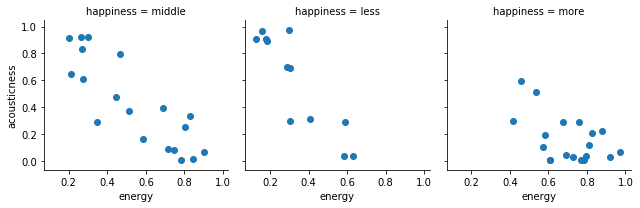

In [15]:
plt.figure(figsize=(12,6))
g = sns.FacetGrid(wedding, col="happiness")
g = g.map(plt.scatter, "energy", "acousticness")

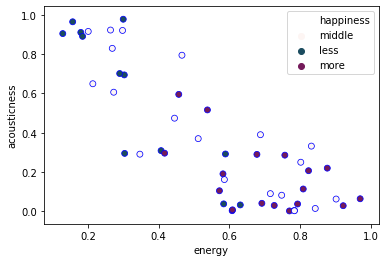

In [24]:
col = [ '#FDF5F3', '#1B4C5F', '#741A5A']
sns.scatterplot("energy", "acousticness", hue = "happiness", palette = col, data = wedding, edgecolor = 'b')